In [13]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucknut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
data = pd.read_csv("Terjemahan_Komen.csv")
data

,Komentar,komen_Eng
0,wahahahahahahahahah,wahahahahahahahaha
1,nyabu om candu sudah,I'm already addicted to opium
2,nyabu ini anak,rape this child
3,liat cara bicara cok cerdas lho,Look how smart you talk
4,buah mimpi ketemu sama bang cok,dream of meeting bro
...,...,...
392,emang orang suka burit gay pakek narkoba kok j...,"Yes, people like gay butts who use drugs, why ..."
393,kalo ga suka mending ga usah nonton ga perlu d...,"If you don't like it, it's better not to watch..."
394,generasi kolot masih anggap komedi baik di tv,The old-fashioned generation still thinks come...
395,say no narkoba say yes hidup bahagia,say no drugs say yes live happily


In [10]:
data_komen = list(data["komen_Eng"])
polaritas = 0

status = []
total_positif = total_negatif = total = 0

for i, komen in enumerate(data_komen):
    analysis = TextBlob(komen)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 166
Negatif = 231

Total Data : 397


In [11]:
data['klasifikasi'] = status
data

,Komentar,komen_Eng,klasifikasi
0,wahahahahahahahahah,wahahahahahahahaha,Negatif
1,nyabu om candu sudah,I'm already addicted to opium,Negatif
2,nyabu ini anak,rape this child,Negatif
3,liat cara bicara cok cerdas lho,Look how smart you talk,Positif
4,buah mimpi ketemu sama bang cok,dream of meeting bro,Negatif
...,...,...,...
392,emang orang suka burit gay pakek narkoba kok j...,"Yes, people like gay butts who use drugs, why ...",Negatif
393,kalo ga suka mending ga usah nonton ga perlu d...,"If you don't like it, it's better not to watch...",Positif
394,generasi kolot masih anggap komedi baik di tv,The old-fashioned generation still thinks come...,Positif
395,say no narkoba say yes hidup bahagia,say no drugs say yes live happily,Positif


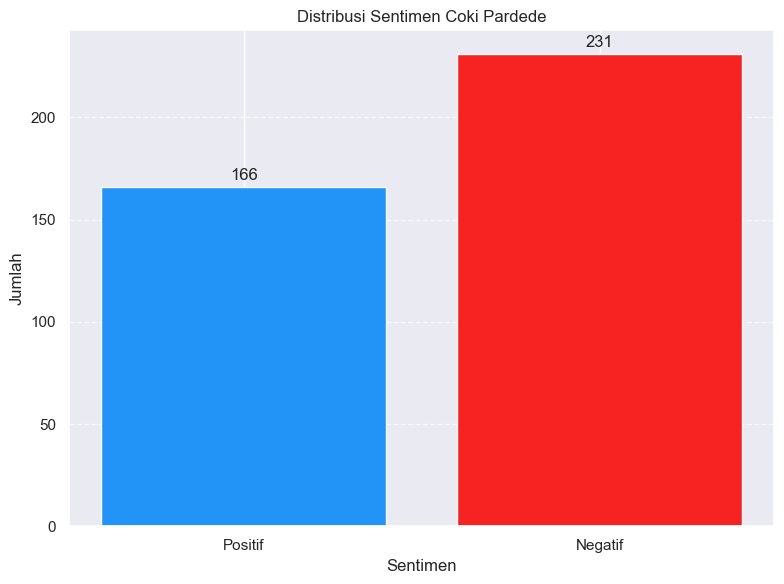

In [14]:
import seaborn as sns

sns.set_theme()  # Set default Seaborn theme

labels = ['Positif', 'Negatif']  # Corrected spelling of 'Positif'
counts = [total_positif, total_negatif]  # Assuming these variables hold sentiment counts

def show_bar_chart(labels, counts, title):

    fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axis

    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])  # Create bars

    # Annotate bar values with proper formatting and positioning
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f"{count:,}",  # Use comma separators for readability
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Style the chart
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.tight_layout()  # Adjust spacing for better readability
    plt.show()

# Call the function with your data
show_bar_chart(labels, counts, "Distribusi Sentimen Coki Pardede")


In [33]:
data

,Komentar,komen_Eng,klasifikasi
0,wahahahahahahahahah,wahahahahahahahaha,Negatif
1,nyabu om candu sudah,I'm already addicted to opium,Negatif
2,nyabu ini anak,rape this child,Negatif
3,liat cara bicara cok cerdas lho,Look how smart you talk,Positif
4,buah mimpi ketemu sama bang cok,dream of meeting bro,Negatif
...,...,...,...
392,emang orang suka burit gay pakek narkoba kok j...,"Yes, people like gay butts who use drugs, why ...",Negatif
393,kalo ga suka mending ga usah nonton ga perlu d...,"If you don't like it, it's better not to watch...",Positif
394,generasi kolot masih anggap komedi baik di tv,The old-fashioned generation still thinks come...,Positif
395,say no narkoba say yes hidup bahagia,say no drugs say yes live happily,Positif


In [18]:
dataset = data.drop(['Komentar'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [19]:
import random

set_positif = []
set_negatif = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))

train = set_positif + set_negatif

train_set = []

for n in train:
     train_set.append(n)

In [20]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.7027707808564232
